In [80]:
# loading recquired libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import ast
import seaborn as sns 

# evironment configuration
np.set_printoptions(linewidth=2000)
np.set_printoptions(threshold=2000)


In [6]:
# data reading
data_file_path = "./tmdb-box-office-prediction/complete_movie_dataset.csv"
dataset = pd.read_csv(data_file_path, encoding="ISO-8859-1")

In [13]:
# print basic informations obout dataset
print("Dataset size:", dataset.size)
print("Dataset shape:", dataset.shape)
print("")
print(dataset.info())
print("")
print("Example records: ")
dataset.head(2) #uncomment to see example record

Dataset size: 170154
Dataset shape: (7398, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7398 non-null   int64  
 1   belongs_to_collection  1481 non-null   object 
 2   budget                 7398 non-null   int64  
 3   genres                 7375 non-null   object 
 4   homepage               2366 non-null   object 
 5   imdb_id                7398 non-null   object 
 6   original_language      7398 non-null   object 
 7   original_title         7398 non-null   object 
 8   overview               7376 non-null   object 
 9   popularity             7398 non-null   float64
 10  poster_path            7396 non-null   object 
 11  production_companies   6984 non-null   object 
 12  production_countries   7241 non-null   object 
 13  release_date           7397 non-null   object 
 14  runtime 

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,08/06/2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0


# Dataset basic description

In [95]:
# decription of numerical column
dataset.describe(include = [np.number])

,id,budget,popularity,runtime,revenue
count,7398.000000,7.398000e+03,7398.000000,7392.000000,3.000000e+03
mean,3699.500000,2.260146e+07,8.514968,107.717262,6.672585e+07
std,2135.762978,3.694867e+07,12.165794,21.480040,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,1850.250000,0.000000e+00,3.933124,94.000000,2.379808e+06
50%,3699.500000,7.500000e+06,7.435844,104.000000,1.680707e+07
75%,5548.750000,2.800000e+07,10.920002,118.000000,6.891920e+07
max,7398.000000,3.800000e+08,547.488298,338.000000,1.519558e+09


In [17]:
# description of objectvalue columns
dataset.describe(include = ['O']) 

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,1481,7375,2366,7398,7398,7398,7376,7396,6984,7241,7397,7336,7396,5938,7395,6729,7372,7360
unique,750,1520,2331,7398,44,7048,7375,7396,5544,654,4703,761,3,5924,7239,6496,7339,7360
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.thehungergames.movie/,tt0889588,en,????,No overview found.,/7svFBuWKSB1CQGHBW43z7x85vfD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",09/10/2010,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Anna Karenina,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe468b9251416c7507ba99', 'de..."
freq,26,614,4,1,6351,52,2,1,123,4339,10,4521,7385,3,3,56,34,1


In [18]:
# all column description
dataset.describe(include='all') 

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,7398.000000,1481,7.398000e+03,7375,2366,7398,7398,7398,7376,7398.000000,...,7397,7392.000000,7336,7396,5938,7395,6729,7372,7360,3.000000e+03
unique,NaN,750,NaN,1520,2331,7398,44,7048,7375,NaN,...,4703,NaN,761,3,5924,7239,6496,7339,7360,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.thehungergames.movie/,tt0889588,en,????,No overview found.,NaN,...,09/10/2010,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Anna Karenina,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe468b9251416c7507ba99', 'de...",NaN
freq,NaN,26,NaN,614,4,1,6351,52,2,NaN,...,10,NaN,4521,7385,3,3,56,34,1,NaN
mean,3699.500000,NaN,2.260146e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.514968,...,NaN,107.717262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,2135.762978,NaN,3.694867e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.165794,...,NaN,21.480040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,1850.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.933124,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,3699.500000,NaN,7.500000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.435844,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,5548.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.920002,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [21]:
# missing values 
dataset.isna().sum()

id                          0
belongs_to_collection    5917
budget                      0
genres                     23
homepage                 5032
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies      414
production_countries      157
release_date                1
runtime                     6
spoken_languages           62
status                      2
tagline                  1460
title                       3
Keywords                  669
cast                       26
crew                       38
revenue                  4398
dtype: int64

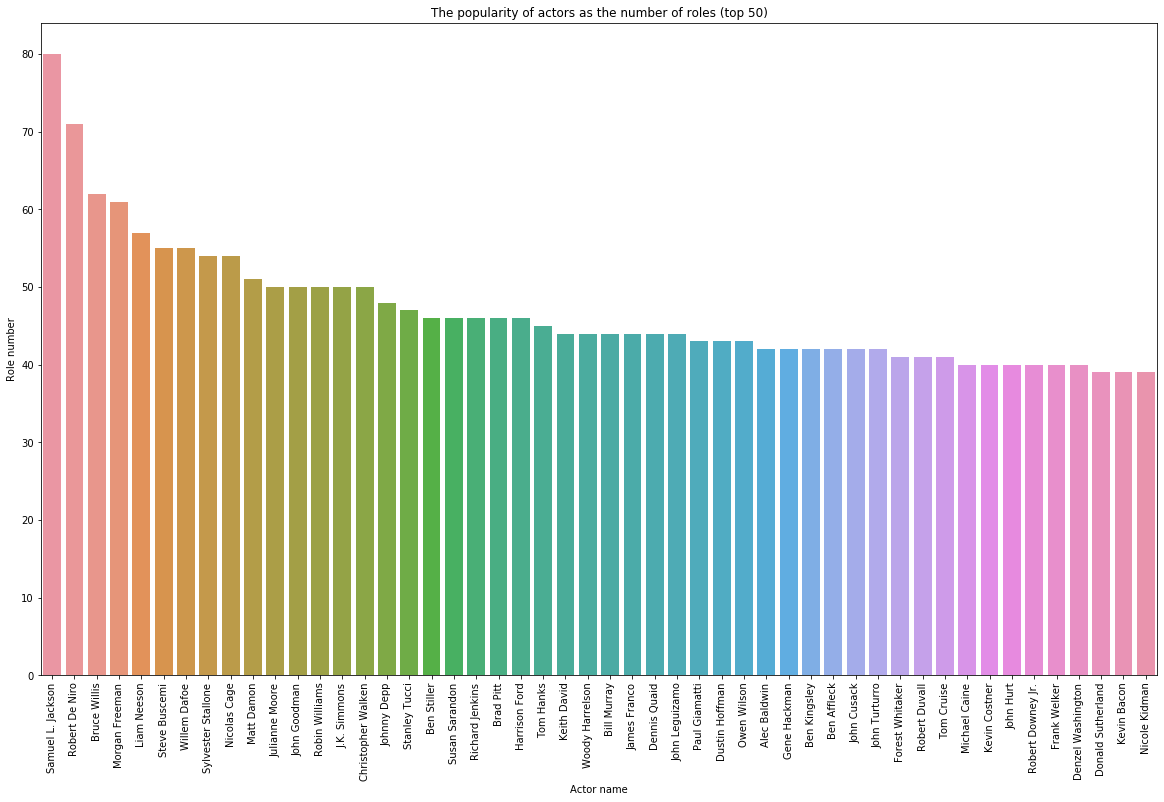

In [90]:
# popularity of an actor expressed as number of films
n = 50
actorMovieDataset = dataset[['id','cast']].copy()
actorMovieDataset['cast'] = actorMovieDataset['cast'].apply(lambda x: {} if pd.isna(x) else [x.get('name') for x in ast.literal_eval(x)])
actorMovieDataset = actorMovieDataset.explode('cast').reset_index(drop=True)
actorMovieDataset = actorMovieDataset.groupby(['cast']).size().reset_index(name='count').sort_values('count', ascending=False)
plt.figure(figsize=(20,12))
sns.barplot(actorMovieDataset['cast'].head(n), actorMovieDataset['count'].head(n))
plt.title("The popularity of actors as the number of roles (top {0})".format(n))
plt.xlabel("Actor name")
plt.ylabel("Role number")
plt.xticks(rotation=90)
plt.show()